In [1]:
%matplotlib notebook
from islpy import *
from support.plot import *
import islplot.plotter as islp

<IPython.core.display.Javascript object>


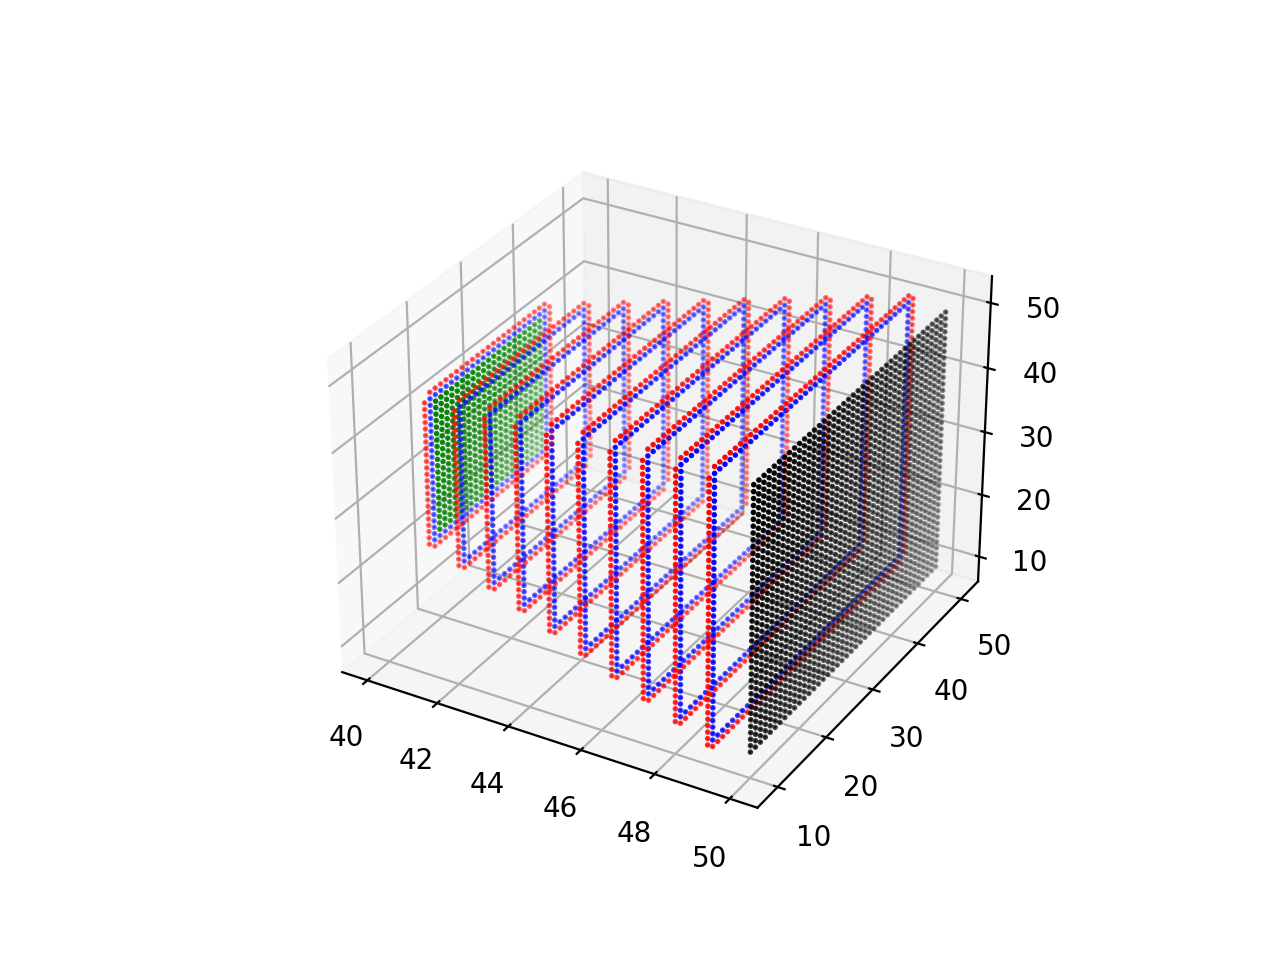

In [2]:
pre = Map('[T,I,J,W]->{ [t,i,j]->[0,t,i,j,p]}')

M = Map('''[T,I,J,W]->{ 
                    [0,t,i,j,p]->[0,t-1,i,j,p+1] : 0<(i-I)+(t-T) and 0<(j-J)+(t-T) and (i-I)-(t-T)<W and (j-J)-(t-T)<W;
                    [0,t,i,j,p]->[1,t-1,i,j,p+1] : 0=(i-I)+(t-T) or (i-I)-(t-T)=W or 0=(j-J)+(t-T) or (j-J)-(t-T)=W;
                    [0,t,i,j,p]->[2,t-1,i-1,j,p+1] : 0=(i-I)+(t-T);
                    [0,t,i,j,p]->[2,t-1,i,j-1,p+1] : 0=(j-J)+(t-T);
                    [0,t,i,j,p]->[2,t-1,i+1,j,p+1] : (i-I)-(t-T)=W;
                    [0,t,i,j,p]->[2,t-1,i,j+1,p+1] : (j-J)-(t-T)=W;
                    [1,t,i,j,p]->[1,t,i,j,p] ;
                    [2,t,i,j,p]->[2,t,i,j,p] ;
        }''')
Mp, exact = M.power()

if not exact:
    raise Exception('power not exact')

def plot_all(bset, T, I, J, W, depth, size=10, limits=None, fig=None):
    domain = BasicSet('[T={},I={},J={},W={}]->{{[T,i,j] : I<=i<=I+W and J<=j<=J+W}}'.format(T, I, J, W))
    D = BasicSet('[T,I,J,W]->{{[{}]}}'.format(depth))
    image = bset.intersect(domain).apply(pre).apply(D.apply(Mp).unwrap())

    K = bset.intersect(domain)
    G = image.apply(BasicMap('[T,I,J,W]->{[0,t,i,j,p]->[t,i,j]}'))
    B = image.apply(BasicMap('[T,I,J,W]->{[1,t,i,j,p]->[t,i,j]}'))
    R = image.apply(BasicMap('[T,I,J,W]->{[2,t,i,j,p]->[t,i,j]}'))

    colors = ['black', 'blue', 'red', 'green']
    plot_set_3d([K, B, R, G], colors=colors)
    x = 0

bset = BasicSet('[T,I,J,W]->{[t,i,j] : 0<=t,i,j<=100 }')

plot_all(bset, T=50, I=10, J=10, W=40, depth=10)